In [55]:
import pandas as pd
import numpy as np
df = pd.read_csv("rawOfflineResults.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)


,uid,alg,params,recAlg,diversityEnhance,noveltyEnhance,R^2,-mae,map,auc,...,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
0,715904,attributeCosineSim,sameAllowed,temporal,no,no,-3.346125,-0.399867,0.268264,0.898561,...,0.052632,0.149754,0.488658,0.603762,0.243555,0.274323,1.0,1.0,0.231029,0.280722
1,715904,attributeCosineSim,sameAllowed,temporal,yes,no,-3.346125,-0.399867,0.266514,0.898561,...,0.052632,0.139253,0.484626,0.599730,0.253492,0.273193,1.0,1.0,0.290936,0.274213
2,715904,attributeCosineSim,sameAllowed,temporal,no,yes,-2.385189,-0.344252,0.389553,0.921574,...,0.078947,0.275268,0.617884,0.682891,0.306567,0.305829,1.0,1.0,0.322857,0.317298
3,715904,attributeCosineSim,sameAllowed,temporal,yes,yes,-2.385189,-0.344252,0.383851,0.921574,...,0.052632,0.247603,0.629472,0.694479,0.306567,0.304319,1.0,1.0,0.336896,0.337286
4,883157,attributeCosineSim,sameAllowed,temporal,no,no,-9.013746,-0.407201,0.198070,0.936791,...,0.176471,0.265476,0.453511,0.536229,0.202006,0.206392,1.0,0.9,0.121897,0.187147


In [57]:
del df["uid"]
df.head()

,alg,params,recAlg,diversityEnhance,noveltyEnhance,R^2,-mae,map,auc,mrr,...,r10,nDCG10,nDCG100,nDCG,novelty5_t,novelty10_t,novelty5_u,novelty10_u,ild5,ild10
0,attributeCosineSim,sameAllowed,temporal,no,no,-3.346125,-0.399867,0.268264,0.898561,0.200000,...,0.052632,0.149754,0.488658,0.603762,0.243555,0.274323,1.0,1.0,0.231029,0.280722
1,attributeCosineSim,sameAllowed,temporal,yes,no,-3.346125,-0.399867,0.266514,0.898561,0.200000,...,0.052632,0.139253,0.484626,0.599730,0.253492,0.273193,1.0,1.0,0.290936,0.274213
2,attributeCosineSim,sameAllowed,temporal,no,yes,-2.385189,-0.344252,0.389553,0.921574,0.333333,...,0.078947,0.275268,0.617884,0.682891,0.306567,0.305829,1.0,1.0,0.322857,0.317298
3,attributeCosineSim,sameAllowed,temporal,yes,yes,-2.385189,-0.344252,0.383851,0.921574,0.500000,...,0.052632,0.247603,0.629472,0.694479,0.306567,0.304319,1.0,1.0,0.336896,0.337286
4,attributeCosineSim,sameAllowed,temporal,no,no,-9.013746,-0.407201,0.198070,0.936791,0.333333,...,0.176471,0.265476,0.453511,0.536229,0.202006,0.206392,1.0,0.9,0.121897,0.187147


[Text(0,0.5,'R^2'),
 Text(0,1.5,'-mae'),
 Text(0,2.5,'map'),
 Text(0,3.5,'auc'),
 Text(0,4.5,'mrr'),
 Text(0,5.5,'p5'),
 Text(0,6.5,'p10'),
 Text(0,7.5,'r5'),
 Text(0,8.5,'r10'),
 Text(0,9.5,'nDCG10'),
 Text(0,10.5,'nDCG100'),
 Text(0,11.5,'nDCG'),
 Text(0,12.5,'novelty5_t'),
 Text(0,13.5,'novelty10_t'),
 Text(0,14.5,'novelty5_u'),
 Text(0,15.5,'novelty10_u'),
 Text(0,16.5,'ild5'),
 Text(0,17.5,'ild10')]

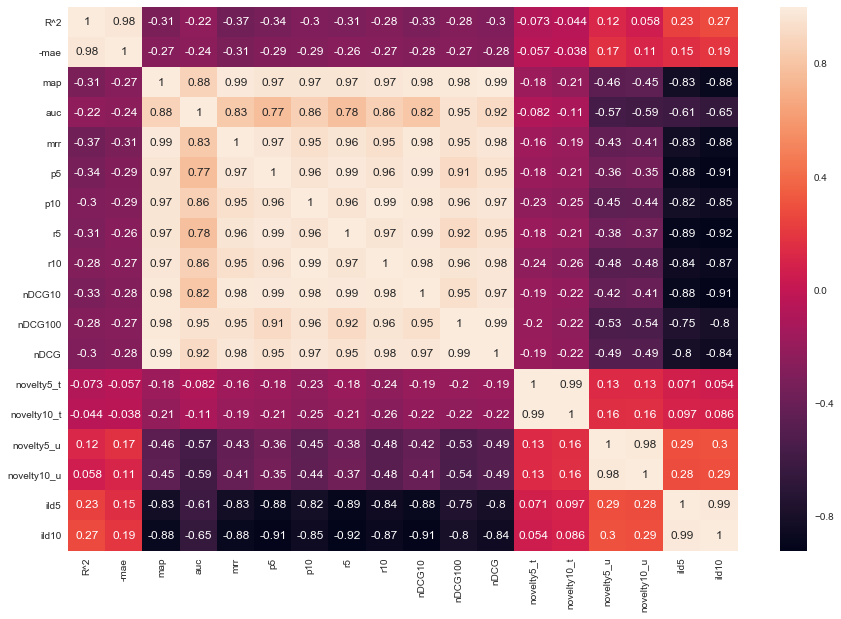

In [58]:
%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(), annot=True)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)


Rating clusters according to >= .95 correlation:
- r2Score, MAE -> mae
- AUC -> AUC
- MAP, MRR, p5, p10,r5,r10, nDCG10 -> mrr
- nDCG100, nDCGFull -> nDCG100
- novelty5/10 -> novelty10
- user_novelty5/10 -> user_novelty10
- ild5/10 -> ild10

In [59]:
#restriction for metrics cluster
df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

In [62]:
def is_pareto_efficient(costs):
    """
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]<=c, axis=1)  # Remove dominated points
    return is_efficient

In [66]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
paretoFront = is_pareto_efficient(dfMean.as_matrix())


In [69]:
len(paretoFront)

800

In [60]:
dfGroup = df.groupby(by=["alg"])
dfMean = dfGroup.mean()
dfMean

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
alg,,,,,,,
attributeCosineSim,-0.395349,0.779854,0.140055,0.208375,0.227867,0.996390,0.262010
doc2vec,-0.371736,0.586351,0.024888,0.051118,0.232385,0.998523,0.803776
word2vec,-0.381724,0.795030,0.087654,0.177847,0.225173,0.988981,0.609071


In [61]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["alg"])
dfMax.max()

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
alg,,,,,,,
attributeCosineSim,-0.360169,0.797143,0.186007,0.241610,0.259307,0.998947,0.442570
doc2vec,-0.213387,0.715438,0.056034,0.101392,0.289464,1.000000,0.888024
word2vec,-0.236003,0.824897,0.134190,0.228718,0.277643,0.999296,0.854862


In [70]:
dfGroup = df.groupby(by=["recAlg"])
dfMean = dfGroup.mean()
dfMean

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
recAlg,,,,,,,
last,-0.342600,0.664190,0.064103,0.114710,0.218487,0.998723,0.687724
max,-0.305175,0.696300,0.047180,0.112108,0.220489,0.988120,0.672592
mean,-0.417120,0.714010,0.076806,0.135773,0.223124,0.986777,0.652804
temporal,-0.405649,0.711538,0.069919,0.125341,0.242546,0.988803,0.650425
temporal10,-0.402623,0.708585,0.066595,0.124493,0.240171,0.994985,0.649710
temporal3,-0.382822,0.696825,0.061299,0.120440,0.236592,0.997564,0.665803
temporal5,-0.395305,0.702029,0.061765,0.121460,0.237797,0.996736,0.657261
window10,-0.392420,0.706925,0.067938,0.130947,0.223613,0.994772,0.654000
window3,-0.363555,0.693093,0.064722,0.124525,0.221484,0.997311,0.669838


In [71]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["recAlg"])
dfMax.max()

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
recAlg,,,,,,,
last,-0.282903,0.770274,0.135444,0.202737,0.233531,1.000000,0.888024
max,-0.213387,0.812594,0.148812,0.218007,0.234889,0.996848,0.821998
mean,-0.356479,0.824897,0.184629,0.239189,0.244435,0.998949,0.865242
temporal,-0.334837,0.822962,0.186007,0.241610,0.289464,0.998949,0.864214
temporal10,-0.340311,0.819348,0.178949,0.234637,0.287666,0.999475,0.864725
temporal3,-0.314958,0.805768,0.172277,0.229024,0.279708,1.000000,0.872585
temporal5,-0.332278,0.811849,0.165979,0.228271,0.279275,1.000000,0.863427
window10,-0.325844,0.816976,0.171028,0.228718,0.250002,0.999475,0.865671
window3,-0.293846,0.803307,0.159895,0.217848,0.246118,1.000000,0.878138


In [72]:
dfGroup = df.groupby(by=["noveltyEnhance"])
dfMean = dfGroup.mean()
dfMean

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
noveltyEnhance,,,,,,,
no,-0.380153,0.697734,0.066659,0.127433,0.215602,0.993771,0.661533
yes,-0.377010,0.700999,0.062504,0.120024,0.241790,0.994283,0.662823


In [73]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["noveltyEnhance"])
dfMax.max()

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
noveltyEnhance,,,,,,,
no,-0.213387,0.822962,0.186007,0.241610,0.224040,1.0,0.888024
yes,-0.213676,0.824897,0.182080,0.235203,0.289464,1.0,0.885079


In [74]:
dfGroup = df.groupby(by=["diversityEnhance"])
dfMean = dfGroup.mean()
dfMean

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
diversityEnhance,,,,,,,
no,-0.378581,0.699367,0.068626,0.128389,0.228538,0.993546,0.589616
yes,-0.378581,0.699367,0.060536,0.119068,0.228855,0.994508,0.734740


In [75]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["diversityEnhance"])
dfMax.max()

,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
diversityEnhance,,,,,,,
no,-0.213387,0.824897,0.177285,0.237075,0.289464,1.0,0.820744
yes,-0.213387,0.824897,0.186007,0.241610,0.283326,1.0,0.888024


In [5]:
dfGroup = df.groupby(by=["alg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean

uid    r2Score  \
alg                noveltyEnhance diversityEnhance                            
attributeCosineSim no             no                2.308897e+06 -99.191495   
                                  yes               2.308897e+06 -98.788598   
                   yes            no                2.308897e+06 -99.191495   
                                  yes               2.308897e+06 -98.788598   
doc2vec            no             no                2.308280e+06 -81.324526   
                                  yes               2.308280e+06 -81.937052   
                   yes            no                2.308280e+06 -81.324526   
                                  yes               2.308280e+06 -81.937052   
word2vec           no             no                2.311779e+06 -83.861204   
                                  yes               2.311779e+06 -81.556900   
                   yes            no                2.311779e+06 -83.861204   
                                  yes               2.311779e+06 -81.556900   

                                                         mae       map  \
alg                noveltyEnhance diversityEnhance                       
attributeCosineSim no             no                0.394805  0.105126   
                                  yes               0.395893  0.099411   
                   yes            no                0.394805  0.106027   
                                  yes               0.395893  0.098712   
doc2vec            no             no                0.371573  0.018090   
                                  yes               0.371898  0.018072   
                   yes            no                0.371573  0.016134   
                                  yes               0.371898  0.016591   
word2vec           no             no                0.385511  0.080030   
                                  yes               0.377936  0.073068   
                   yes            no                0.385511  0.065625   
                                  yes               0.377936  0.060501   

                                                    aucScore       mrr  \
alg                noveltyEnhance diversityEnhance                       
attributeCosineSim no             no                0.778651  0.141871   
                                  yes               0.781057  0.135509   
                   yes            no                0.778651  0.146801   
                                  yes               0.781057  0.136039   
doc2vec            no             no                0.582936  0.026976   
                                  yes               0.589765  0.025624   
                   yes            no                0.582936  0.023540   
                                  yes               0.589765  0.023411   
word2vec           no             no                0.795093  0.099191   
                                  yes               0.794967  0.091913   
                   yes            no                0.795093  0.082723   
                                  yes               0.794967  0.076788   

                                                          p5       p10  \
alg                noveltyEnhance diversityEnhance                       
attributeCosineSim no             no                0.056474  0.046053   
                                  yes               0.050368  0.041509   
                   yes            no                0.057228  0.047079   
                                  yes               0.050526  0.041912   
doc2vec            no             no                0.006071  0.006990   
                                  yes               0.006227  0.006848   
                   yes            no                0.003748  0.004752   
                                  yes               0.004526  0.005223   
word2vec           no             no                0.041800  0.045391   
                                  yes               0.036753  0.03

In [8]:
df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","mae", "aucScore", "mrr", "nDCGFull","novelty10","user_novelty10","ild10"]]
df.head()

,alg,params,recAlg,noveltyEnhance,diversityEnhance,r2Score,aucScore,mrr,nDCGFull,novelty10,user_novelty10,ild10
0,attributeCosineSim,sameAllowed,temporal,no,no,-3.346125,0.898561,0.200000,0.603762,0.274323,0.0,0.280722
1,attributeCosineSim,sameAllowed,temporal,yes,no,-3.346125,0.898561,0.200000,0.599730,0.273193,0.0,0.274213
2,attributeCosineSim,sameAllowed,temporal,no,yes,-2.385189,0.921574,0.333333,0.682891,0.305829,0.0,0.317298
3,attributeCosineSim,sameAllowed,temporal,yes,yes,-2.385189,0.921574,0.500000,0.694479,0.304319,0.0,0.337286
4,attributeCosineSim,sameAllowed,temporal,no,no,-9.013746,0.936791,0.333333,0.536229,0.206392,0.1,0.187147


In [9]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.head()

r2Score  \
alg                params        recAlg noveltyEnhance diversityEnhance               
attributeCosineSim noSameObjects last   no             no                -91.822720   
                                                       yes               -91.857046   
                                        yes            no                -91.822720   
                                                       yes               -91.857046   
                                 max    no             no               -108.736169   

                                                                         aucScore  \
alg                params        recAlg noveltyEnhance diversityEnhance             
attributeCosineSim noSameObjects last   no             no                0.736751   
                                                       yes               0.738166   
                                        yes            no                0.736751   
                                                       yes               0.738166   
                                 max    no             no                0.795054   

                                                                              mrr  \
alg                params        recAlg noveltyEnhance diversityEnhance             
attributeCosineSim noSameObjects last   no             no                0.134829   
                                                       yes               0.131909   
                                        yes            no                0.135444   
                                                       yes               0.133143   
                                 max    no             no                0.139913   

                                                                         nDCGFull  \
alg                params        recAlg noveltyEnhance diversityEnhance             
attributeCosineSim noSameObjects last   no             no                0.267841   
                                                       yes               0.265332   
                                        yes            no                0.270085   
                                                       yes               0.268207   
                                 max    no             no                0.277381   

                                                                         novelty10  \
alg                params        recAlg noveltyEnhance diversityEnhance              
attributeCosineSim noSameObjects last   no             no                 0.216582   
                                                       yes                0.222839   
                                        yes            no                 0.217033   
                                                       yes                0.223193   
                                 max    no             no                 0.220340   

                                                                         user_novelty10  \
alg                params        recAlg noveltyEnhance diversityEnhance                   
attributeCosineSim noSameObjects last   no             no                      0.001754   
                                                       yes                     0.001228   
                                        yes            no                      0.001754   
                                                       yes                     0.001754   
                                 max    no             no                      0.007544   

                                                                            ild10  
alg                params        recAlg noveltyEnhance diversityEnhance            
attributeCosineSim noSameObjects last   no             no                0.213208  
                                                       yes               0.213817  
                                        yes            no                0.240683  
                 

In [10]:
max = dfMean.idxmax()
min = dfMean.idxmin()

In [11]:
min

r2Score                            (doc2vec, 32,5, mean, no, yes)
aucScore                           (doc2vec, 128,5, last, no, no)
mrr                               (doc2vec, 128,5, max, yes, yes)
nDCGFull                          (doc2vec, 128,5, max, yes, yes)
novelty10                           (doc2vec, 64,5, last, no, no)
user_novelty10                     (doc2vec, 128,1, last, no, no)
ild10             (attributeCosineSim, sameAllowed, last, no, no)
dtype: object

In [12]:
max

r2Score                              (doc2vec, 128,5, max, no, yes)
aucScore                            (word2vec, 32,1, mean, no, yes)
mrr               (attributeCosineSim, noSameObjects, temporal, ...
nDCGFull          (attributeCosineSim, noSameObjects, temporal, ...
novelty10                       (doc2vec, 128,1, temporal, no, yes)
user_novelty10                       (word2vec, 64,5, mean, no, no)
ild10                               (doc2vec, 128,1, last, yes, no)
dtype: object

In [13]:
set(max).union(set(min))

{('attributeCosineSim', 'noSameObjects', 'temporal', 'yes', 'no'),
 ('attributeCosineSim', 'sameAllowed', 'last', 'no', 'no'),
 ('doc2vec', '128,1', 'last', 'no', 'no'),
 ('doc2vec', '128,1', 'last', 'yes', 'no'),
 ('doc2vec', '128,1', 'temporal', 'no', 'yes'),
 ('doc2vec', '128,5', 'last', 'no', 'no'),
 ('doc2vec', '128,5', 'max', 'no', 'yes'),
 ('doc2vec', '128,5', 'max', 'yes', 'yes'),
 ('doc2vec', '32,5', 'mean', 'no', 'yes'),
 ('doc2vec', '64,5', 'last', 'no', 'no'),
 ('word2vec', '32,1', 'mean', 'no', 'yes'),
 ('word2vec', '64,5', 'mean', 'no', 'no')}

In [15]:
dfMean.to_csv("offlineResults.csv", sep=";")